# Description of the Task
Stock Market Prediction And Forecasting Using Stacked LSTM

# Name : Danish Jameel 
# Month : Augest
# Date : 31-Augest-2022
# LetsGrow-more-Task-2
# Stage : 1 Begineer Level Task.
# Stock Market Prediction And Forecasting Using Stacked LSTM



In [ ]:
#This Program Uses as an Artificial Intelligence Recurrent Neural Networks Called LSTM (Long Short Term Memory ) To predict the 
#closing price of the Stock  using the past Data 

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
data = df[['Date','Open','Close']] # Extracting required columns
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: x.split()[0])) # Selecting only date
data.set_index('Date',drop=True,inplace=True) # Setting date column as index
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,Close
Date,,
2018-09-28,234.05,233.75
2018-09-27,234.55,233.25
2018-09-26,240.00,234.25
2018-09-25,233.30,236.10
2018-09-24,233.55,233.30


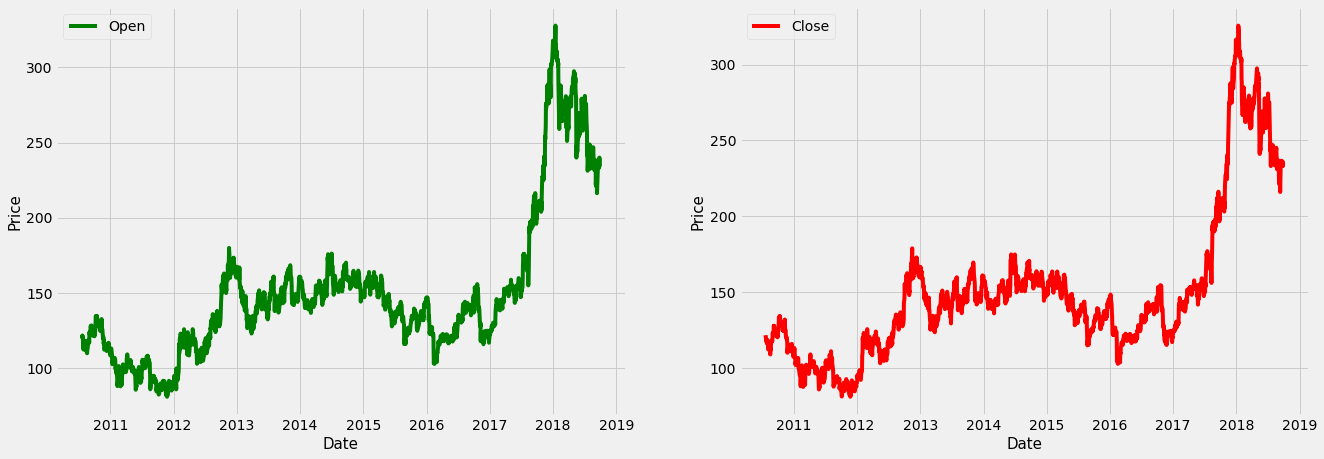

In [ ]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(data['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2+ KB


In [ ]:
df.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of               Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
...            ...     ...     ...     ...     ...                   ...   
2010-07-27  117.60  119.50  112.00  118.80  118.65                586100   
2010-07-26  120.10  121.00  117.10  117.10  117.60                658440   
2010-07-23  121.80  121.95  120.25  120.35  120.65                281312   
2010-07-22  120.30  122.00  120.25  120.75  120.90                293312   
2010-07-21  122.10  123.00  121.05  121.10  121.

In [ ]:
#Get the  Numbers of Rows and Coloumns in the data set 
df.shape

(2035, 7)

In [ ]:
df.shape

(2035, 7)

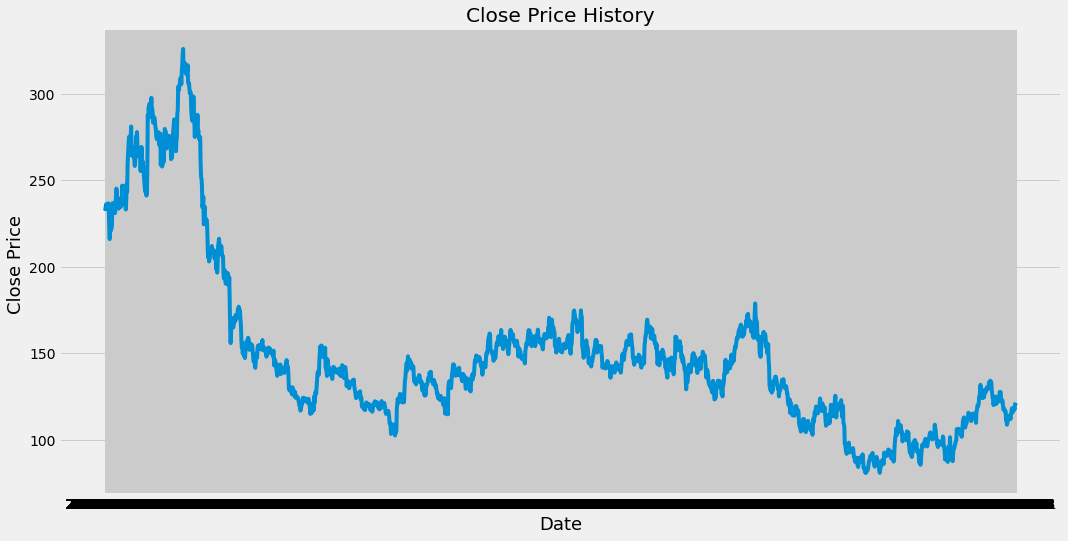

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price ',fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len= math.ceil(len(dataset) * .8)

#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [ ]:
#Create training data set

train_data=scaled_data[0:training_data_len,:]

#split the data into x_train and y_train data sets

x_train =[]
y_train=[]


for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:

    print(x_train)
    print(y_train)
    print()

[array([0.62418301, 0.62214052, 0.62622549, 0.63378268, 0.62234477,
       0.62765523, 0.62888072, 0.62949346, 0.63582516, 0.625     ,
       0.57883987, 0.55167484, 0.57618464, 0.58006536, 0.57230392,
       0.57781863, 0.58312908, 0.63623366, 0.62642974, 0.63337418,
       0.62745098, 0.62254902, 0.6376634 , 0.61294935, 0.63112745,
       0.65196078, 0.67075163, 0.66196895, 0.64705882, 0.63970588,
       0.62745098, 0.62336601, 0.63868464, 0.63480392, 0.63991013,
       0.64767157, 0.62785948, 0.63112745, 0.63194444, 0.67790033,
       0.65870098, 0.65890523, 0.64603758, 0.63705065, 0.67544935,
       0.66319444, 0.6439951 , 0.62152778, 0.64419935, 0.68198529,
       0.6629902 , 0.72691993, 0.75265523, 0.77144608, 0.79166667,
       0.79370915, 0.75714869, 0.77736928, 0.80208333, 0.81719771])]
[0.7495915032679739]



In [ ]:
#convert train data to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

#Reshape
x_train.shape

(1568, 60)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1568, 60, 1)

In [ ]:
# build LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#copile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1568/1568 [==============================] - 47s 27ms/step - loss: 0.0021


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:,:]
#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

In [ ]:
#convert the data to a numpy array
x_test=np.array(x_test)
#reshape
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt( np.mean((predictions - y_test)**2))
rmse

6.987453836771359

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


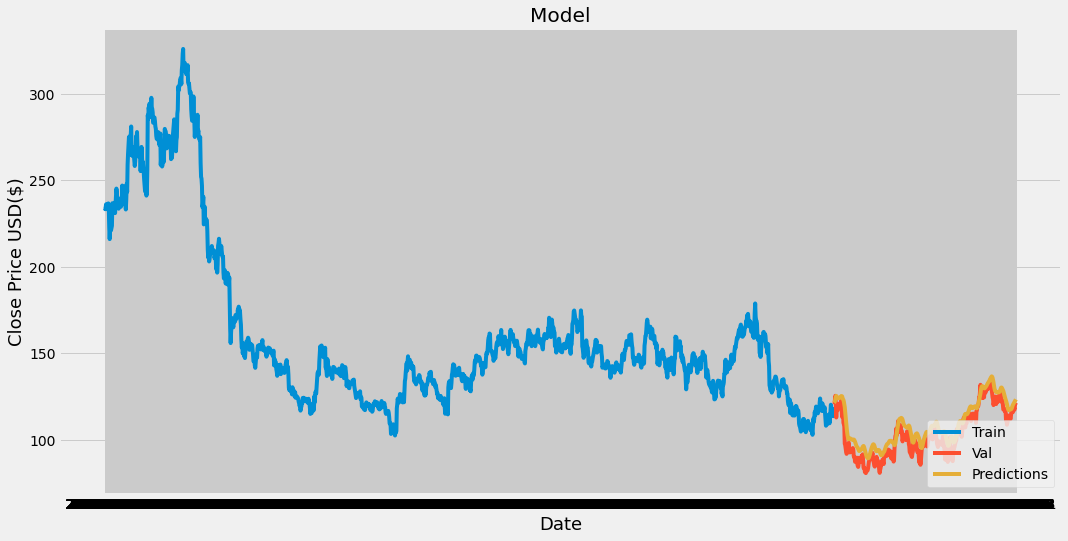

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2012-03-03,120.40,121.521820
2012-03-02,120.55,121.869484
2012-03-01,123.35,122.462219
2012-02-29,125.55,123.431732
2012-02-28,120.70,124.735283
...,...,...
2010-07-27,118.65,121.556206
2010-07-26,117.60,122.038849
2010-07-23,120.65,122.355400
